# Assignment 2: Engineering Predictive Features

**Student Name:** Alex Tomasella

**Date:** 02/07/2026

---

## Assignment Overview

In this assignment, you'll practice feature engineering by creating new predictive features from the Ames Housing dataset. You'll build a baseline model with raw features, engineer at least 5 new features based on real estate intuition, and measure how feature engineering improves model performance.

---

## Step 1: Import Libraries and Load Data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
# Load the Ames Housing dataset
# TODO: Load train.csv from the data folder
df = pd.read_csv("data/train.csv")  # Replace with pd.read_csv()

# Display basic information
# TODO: Display the first few rows and basic info about the dataset
print(df.head())
print(df.info())

print("\n" + "="*80)
print("CHECKPOINT: Verify dataset loaded correctly")
print(f"Dataset shape: {df.shape if df is not None else 'Not loaded'}")
print("="*80)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

---
## Step 2: Build Baseline Model with Raw Features

### Select Raw Features for Baseline

Select 10-15 raw features to use in your baseline model. Here's a suggested starting set (you can adjust):

**Suggested features:**
- `GrLivArea` - Above grade living area square feet
- `OverallQual` - Overall material and finish quality
- `YearBuilt` - Original construction year
- `TotalBsmtSF` - Total basement square feet
- `FullBath` - Full bathrooms above grade
- `BedroomAbvGr` - Bedrooms above grade
- `GarageArea` - Size of garage in square feet
- `LotArea` - Lot size in square feet
- `Neighborhood` - Physical location (categorical)
- Add 5-10 more features you think are important

In [5]:
# Select features for baseline model
# TODO: Create a list of feature names you want to use
baseline_features = [
    'GrLivArea',
    'OverallQual',
    'YearBuilt',
    'TotalBsmtSF',
    'FullBath',
    'BedroomAbvGr',
    'GarageArea',
    'LotArea',
    'Neighborhood',
    'PoolArea',
    'YrSold',
    'SaleCondition',
    'SaleType'

]

# TODO: Create X (features) and y (target) for baseline
# Make sure to handle missing values and encode categorical variables
X_baseline = df[baseline_features]  # Replace with your feature matrix
y = df['SalePrice']  # Replace with df['SalePrice']

print(f"Baseline features selected: {len(baseline_features)}")
print(f"Target variable shape: {y.shape if y is not None else 'Not defined'}")

Baseline features selected: 13
Target variable shape: (1460,)


### Preprocess Baseline Features

In [6]:
# Handle missing values
# TODO: Fill missing values appropriately
# Numeric: Use median or 0
# Categorical: Use 'None' or most frequent

number_features = X_baseline.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_baseline.select_dtypes(include=['object']).columns
X_baseline[number_features] = X_baseline[number_features].fillna(X_baseline[number_features].median())
X_baseline[categorical_features] = X_baseline[categorical_features].fillna('None')


# Encode categorical variables
# TODO: Use pd.get_dummies() for categorical features
X_baseline = pd.get_dummies(X_baseline, columns=categorical_features, drop_first=True)


print("\n" + "="*80)
print("CHECKPOINT: After preprocessing")
print(f"X_baseline shape: {X_baseline.shape if X_baseline is not None else 'Not defined'}")
print(f"Missing values: {X_baseline.isnull().sum().sum() if X_baseline is not None else 'N/A'}")
print("="*80)


CHECKPOINT: After preprocessing
X_baseline shape: (1460, 47)
Missing values: 0


C:\Users\aatra\AppData\Local\Temp\ipykernel_20660\1821699376.py:7: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_features = X_baseline.select_dtypes(include=['object']).columns


### Train Baseline Model

In [8]:
# Split data into train and test sets
# TODO: Use train_test_split with test_size=0.2, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X_baseline, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)  # Replace with train_test_split()

# Train baseline Random Forest model
# TODO: Create and train RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model = RandomForestRegressor(n_estimators=100, random_state=42)# Replace with trained model


# Make predictions
# TODO: Generate predictions on test set
baseline_model.fit(X_train, y_train)  
baseline_predictions = baseline_model.predict(X_test)  # Replace with predictions

# Calculate metrics
# TODO: Calculate R² and RMSE
baseline_r2 = r2_score(y_test, baseline_predictions)  # Replace with r2_score()
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))  # Replace with np.sqrt(mean_squared_error())

print("\n" + "="*80)
print("BASELINE MODEL RESULTS")
print("="*80)
print(f"R² Score: {baseline_r2 if baseline_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${baseline_rmse:,.2f}" if baseline_rmse is not None else "RMSE: Not calculated")
print("="*80)


BASELINE MODEL RESULTS
R² Score: 0.8716499246694664
RMSE: $31,376.53


### Visualize Baseline Feature Importances

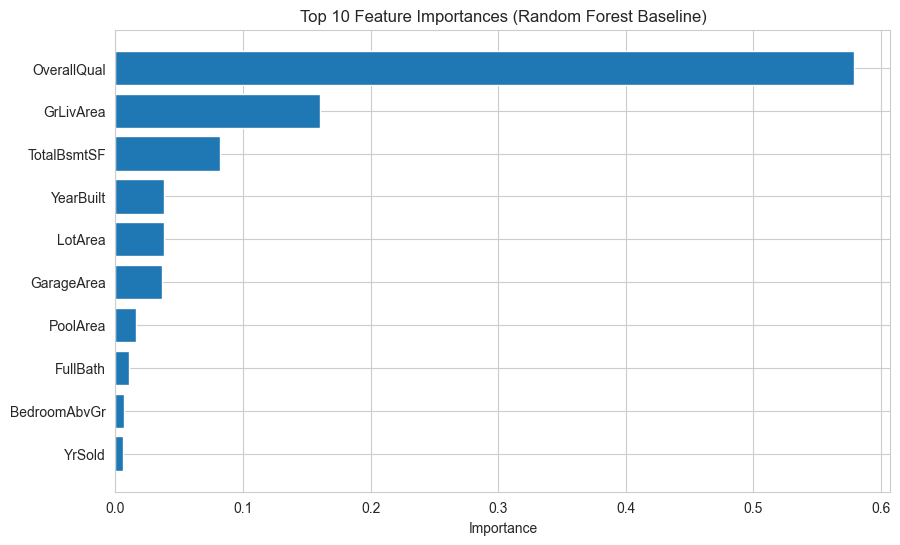


CHECKPOINT: Review which raw features are most important


In [10]:
# Extract and visualize feature importances
# TODO: Get feature importances from baseline_model
# TODO: Create a horizontal bar plot of top 10 features

feature_names = X_train.columns
feature_importances = baseline_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top_10= feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10['Feature'], top_10['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances (Random Forest Baseline)')
plt.gca().invert_yaxis()
plt.show()


print("\n" + "="*80)
print("CHECKPOINT: Review which raw features are most important")
print("="*80)

---
## Step 3: Engineer New Features

### HouseAge: YrSold - [YearBuilt]

**Business Justification:**
This feature will measure the age of a home at the time it was sold. We take the difference between YrSold and YearBuilt. It helps use predict the pricing because the age of the house is a factor when it comes to buying a new/old house. When it comes to real estate intuition, the age of the house could effect its electric and how well it works and things like this which could either raise or lower the price of the house. 

In [13]:
# TODO: Create your first engineered feature
# Example: df['total_bathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']
df['HouseAge'] = df['YrSold'] - df['YearBuilt'] 
print(df['HouseAge'].head())

0     5
1    31
2     7
3    91
4     8
Name: HouseAge, dtype: int64


### ConditionPerAge: [OverallCond] - [HouseAge]

**Business Justification:**
This measures if the age of the house has a direct correlation with the overall condition of the house. It can help us see how much the age effects the house and evaluate the price from there. My real estate intuition says that older hosues will be less valuable and be in worse shape. 

In [14]:
# TODO: Create your second engineered feature
df['ConditionPerAge'] = df['OverallCond'] / (df['HouseAge'] + 1)
print(df['ConditionPerAge'].head())

0    0.833333
1    0.250000
2    0.625000
3    0.054348
4    0.555556
Name: ConditionPerAge, dtype: float64


### SizeToLotRatio: [GrLivArea] - [LotArea]

**Business Justification:**
This measures how much of the property is used by the actual house. This helps the prediction because some buyers like to have a bigger yard than house and can change based on the amount of land. My real estate inution is saying that a bigger yard may be better sicne that is what a lot of advertisments say. 

In [15]:
# TODO: Create your third engineered feature
df['SizeToLotRatio'] = df['GrLivArea'] / df['LotArea']
print(df['SizeToLotRatio'].head())

0    0.202367
1    0.131458
2    0.158756
3    0.179791
4    0.154137
Name: SizeToLotRatio, dtype: float64


### total_bathrooms: [FullBath] + 0.5 * ['HalfBath']

**Business Justification:**
This measure the total amount of bathrooms in the house. This could help predict because the more bathrooms the more squarefoot the house most likely is and the more expensive it will be. 

In [18]:
# TODO: Create your fourth engineered feature
df['total_bathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']
print(df['total_bathrooms'].head())

0    2.5
1    2.0
2    2.5
3    1.0
4    2.5
Name: total_bathrooms, dtype: float64


### QualityPerSqFt: [OverallQual] / [GrLivArea]

**Business Justification:**
This feature will help us see the quality based on the size of the room. This could help predict because a smaller home with good quality may be worth more then a bigger home with bad quality. My intuition says that buyers typically look ore at square feet then the well built home. 

In [17]:
# TODO: Create your fifth engineered feature
df['LivingAreaPerBedroom'] = df['GrLivArea'] / (df['BedroomAbvGr'] + 1)
print(df['LivingAreaPerBedroom'].head())

0    427.50
1    315.50
2    446.50
3    429.25
4    439.60
Name: LivingAreaPerBedroom, dtype: float64


### Add More Engineered Features (Optional)

You can create additional features beyond the required 5 if you think they'll improve performance.

In [ ]:
# Optional: Create additional engineered features


---
## Step 4: Train Model with Engineered Features

In [23]:
# Create feature list combining baseline + engineered features
# TODO: List all your engineered feature names
engineered_features = [
    'HouseAge',
    'ConditionPerAge',
    'SizeToLotRatio',
    'total_bathrooms',
    'LivingAreaPerBedroom'
]

# Combine baseline and engineered features
all_features = baseline_features + engineered_features

# TODO: Create X_engineered with all features
# Remember to handle missing values and encode categoricals
X_engineered = df[all_features].copy()
y = df['SalePrice'].copy()  
num_cols = X_engineered.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_engineered.select_dtypes(include=['object']).columns

X_engineered[num_cols] = X_engineered[num_cols].fillna(X_engineered[num_cols].median())
X_engineered[cat_cols] = X_engineered[cat_cols].fillna('None')
X_engineered = pd.get_dummies(X_engineered, columns=cat_cols, drop_first=True)

print(f"Total features in engineered model: {len(all_features)}")
print(f"New engineered features: {len(engineered_features)}")

Total features in engineered model: 18
New engineered features: 5


C:\Users\aatra\AppData\Local\Temp\ipykernel_20660\1961278706.py:19: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = X_engineered.select_dtypes(include=['object']).columns


In [24]:
# Split data (use same random_state for fair comparison)
# TODO: Split X_engineered and y
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_engineered,
                                                                y,
                                                                test_size=0.2,
                                                                random_state=42)

# Train model with engineered features
# TODO: Train RandomForestRegressor(n_estimators=100, random_state=42)
engineered_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Replace with trained model
engineered_model.fit(X_train_eng, y_train_eng)

# Make predictions
# TODO: Generate predictions on test set
engineered_predictions = engineered_model.predict(X_test_eng)  # Replace with predictions
# Calculate metrics
# TODO: Calculate R² and RMSE
engineered_r2 = r2_score(y_test_eng, engineered_predictions)  # Replace with r2_score()
engineered_rmse = np.sqrt(mean_squared_error(y_test_eng, engineered_predictions))  # Replace with np.sqrt(mean_squared_error())

print("\n" + "="*80)
print("ENGINEERED MODEL RESULTS")
print("="*80)
print(f"R² Score: {engineered_r2 if engineered_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${engineered_rmse:,.2f}" if engineered_rmse is not None else "RMSE: Not calculated")
print("="*80)


ENGINEERED MODEL RESULTS
R² Score: 0.8934565947718434
RMSE: $28,587.11


---
## Step 5: Compare Models and Identify Most Valuable Features

### Create Comparison Table

In [25]:
# Create comparison DataFrame
# TODO: Create a table comparing baseline vs engineered model
comparison = pd.DataFrame({
    'Model' : ['Baseline', 'Engineered'],
    'R² Score': [baseline_r2, engineered_r2],
    'RMSE': [baseline_rmse, engineered_rmse]
})  # Replace with pd.DataFrame()

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
# TODO: Display comparison table
print(comparison.to_string(index=False))

print("="*80)

# Calculate improvement
if baseline_r2 is not None and engineered_r2 is not None:
    r2_improvement = ((engineered_r2 - baseline_r2) / baseline_r2) * 100
    rmse_improvement = ((baseline_rmse - engineered_rmse) / baseline_rmse) * 100
    print(f"\nR² Improvement: {r2_improvement:.2f}%")
    print(f"RMSE Improvement: {rmse_improvement:.2f}%")


MODEL COMPARISON
     Model  R² Score         RMSE
  Baseline  0.871650 31376.534966
Engineered  0.893457 28587.106767

R² Improvement: 2.50%
RMSE Improvement: 8.89%


### Visualize Feature Importances from Engineered Model

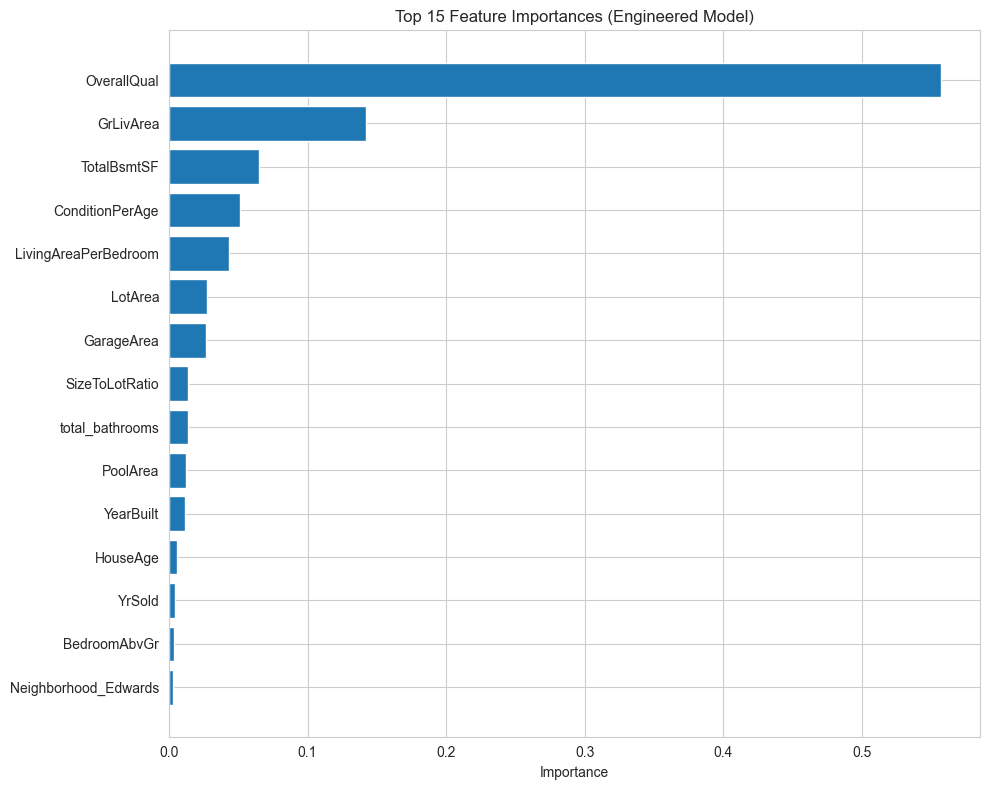

In [26]:
# Extract and visualize top 15 feature importances
# TODO: Get feature importances from engineered_model
engineered_feature_names = X_train_eng.columns
engineered_feature_importances = engineered_model.feature_importances_
engineered_feature_importance_df = pd.DataFrame({
    'Feature': engineered_feature_names,
    'Importance': engineered_feature_importances
}).sort_values(by='Importance', ascending=False)    
# TODO: Create horizontal bar plot of top 15 features
top_15_features = engineered_feature_importance_df.head(15)
plt.figure(figsize=(10, 8))
plt.barh(top_15_features['Feature'], top_15_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (Engineered Model)')
plt.gca().invert_yaxis()  # Show highest importance at the top
plt.tight_layout()
plt.show()

### Analysis: Most Valuable Features

**Write 3-5 bullet points analyzing your results:**

- I had all 5 of mine in the top 15: HouseAge, total_bathrooms,SizeToLotratio, LivingAreaPerBedroom, and ConditionPerAge
- I think these all performed well because I was really trying to think of things that would matter to me if I was looking into buying a home and I assued other people would have similar concerns.
- honestly, I though total-bathrooms would be higher just because I feel like that is a big deal, especially if you are a family like mine where there is 5 of us. 

---
## Step 6: Submit Your Work

Before submitting:
1. Make sure all code cells run without errors
2. Verify you have at least 5 engineered features with business justifications
3. Check that your comparison table and visualizations display correctly
4. Complete the analysis section above

Then push to GitHub:
```bash
git add .
git commit -m 'completed feature engineering assignment'
git push
```

Submit your GitHub repository link on the course platform.